In [1]:
import pandas as pd
from Models.LassoRegression import LassoRegression
from Models.RidgeRegression import RidgeRegression
from Models.RandomForestRegressor import RandomForestReg
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from pipeline import Pipeline
from sklearn.model_selection import train_test_split


2024-03-15 05:54:16.335 | INFO     | preprocessing.abstract_prep:<module>:5 - Successfully imported 'abstract_prep' file
2024-03-15 05:54:16.340 | INFO     | preprocessing.check_nans:<module>:6 - Successfully imported 'CheckNans' file
2024-03-15 05:54:16.341 | INFO     | preprocessing.minmax_scaler:<module>:8 - Successfully imported 'MinMaxScaler' file
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("Data/cleaned_data.csv")
X = data.drop("CREDIT_SCORE", axis=1)
y = data["CREDIT_SCORE"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Catboost with Optuna

In [13]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error
# from helper import logger
# from preprocessing.minmax_scaler import MinMaxScaling

# # Load the data
# data = pd.read_csv("Data/cleaned_data.csv")

# # Split the data into features (X) and target variable (y)
# X = data.drop("CREDIT_SCORE", axis=1)
# y = data["CREDIT_SCORE"]

# # Instantiate MinMaxScaling class
# scaler = MinMaxScaling()

# # Fit and transform the data
# scaled_X = scaler.transform(X)

# # Split the scaled data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

# # Initialize the linear regression model
# model = LinearRegression()

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = model.predict(X_test)

# # Evaluate the model using R-squared and Mean Squared Error
# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)

# logger.info(f"R-squared Score: {r2}")
# logger.info(f"Mean Squared Error: {mse}")


In [14]:
# lasso_params = {
#     'alpha': (0.00001, 1),
#     'max_iter': (500000, 1000000),
#     'selection': ('cyclic', 'random')
# }
# rf_params = {
#     'n_estimators': (50, 100),
#     'criterion': ('poisson', 'squared_error', 'absolute_error', 'friedman_mse'),
#     'max_depth': (5, 20),
#     'min_samples_leaf': (1, 5),
#     'min_samples_split': (2, 10)
# }
# ridge_params = {
#     'alpha': (0.1, 1.0),
#     'max_iter': (50, 200)
# }


In [15]:
# optuna_hyperparameter_tuning(Lasso, lasso_params, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
# optuna_hyperparameter_tuning(RandomForestRegressor, rf_params, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
# optuna_hyperparameter_tuning(Ridge, ridge_params, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


In [16]:
models = [
    (LassoRegression("LassoReg", alpha=0.09498747565849862, max_iter=1000000, selection="cyclic",random_state=42),'LassoRegression'), 
    (RandomForestReg('RandomForestRegressor', n_estimators=100, criterion='friedman_mse', max_depth= 20, min_samples_leaf=5, min_samples_split= 10,random_state=42),'RandomForestRegression'),
    (RidgeRegression("RidgeRegression", alpha = 0.49888557073491463, max_iter = 50, random_state=42), "RidgeRegression")
]
model_scores = []

for model, model_name in models:
    pipeline = Pipeline(data ,model)
    scores = pipeline.fit_transform()
    scores['Model'] = model_name
    model_scores.append(scores)
    
scores_df = pd.DataFrame(model_scores)
print(scores_df)

2024-03-15 07:48:27.661 | INFO     | pipeline:fit_transform:30 - Training the model
2024-03-15 07:48:27.672 | INFO     | pipeline:data_preprocessing:19 - Data Preprocessing
2024-03-15 07:48:27.673 | INFO     | preprocessing.check_nans:transform:14 - CheckNans is starting
2024-03-15 07:48:27.675 | INFO     | preprocessing.check_nans:transform:17 - No NaNs in dataframe
2024-03-15 07:48:27.686 | INFO     | preprocessing.minmax_scaler:fit:16 - _MinMaxScaler preprocessing class_ is fitting
2024-03-15 07:48:27.690 | INFO     | preprocessing.minmax_scaler:fit:19 - _MinMaxScaler preprocessing class_ fitting ended
2024-03-15 07:48:27.691 | INFO     | preprocessing.minmax_scaler:transform:38 - _MinMaxScaler preprocessing class_ is starting transformation
2024-03-15 07:48:27.693 | INFO     | preprocessing.minmax_scaler:transform:41 - _MinMaxScaler preprocessing class_ transformation ended
2024-03-15 07:48:27.862 | INFO     | preprocessing.check_and_remove_outliers:transform:31 - Number of outlier

        MAE       MSE      RMSE        R2      MAPE                   Model
0  0.086433  0.012785  0.113070 -0.008454  0.178118         LassoRegression
1  0.042415  0.003979  0.063079  0.686138  0.078624  RandomForestRegression
2  0.037513  0.003173  0.056333  0.749679  0.068263         RidgeRegression


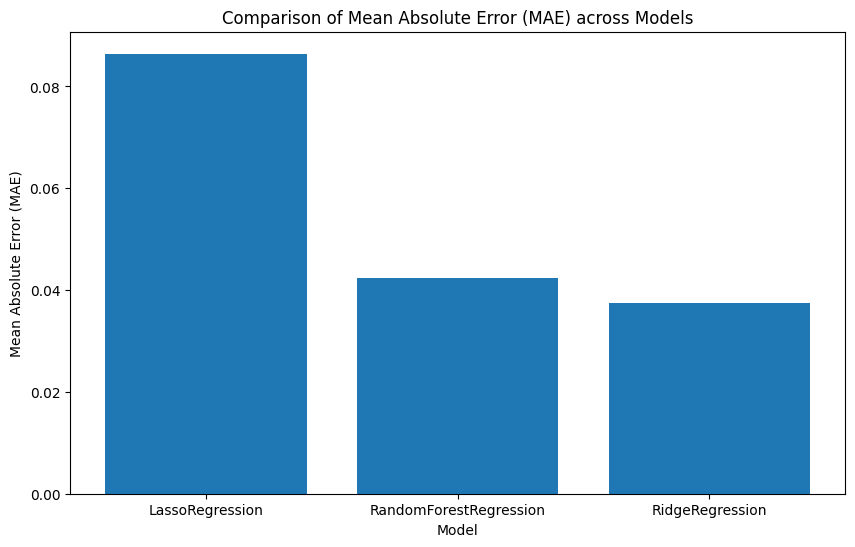

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(scores_df['Model'], scores_df['MAE'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) across Models')
plt.xticks(rotation=0)
plt.show()

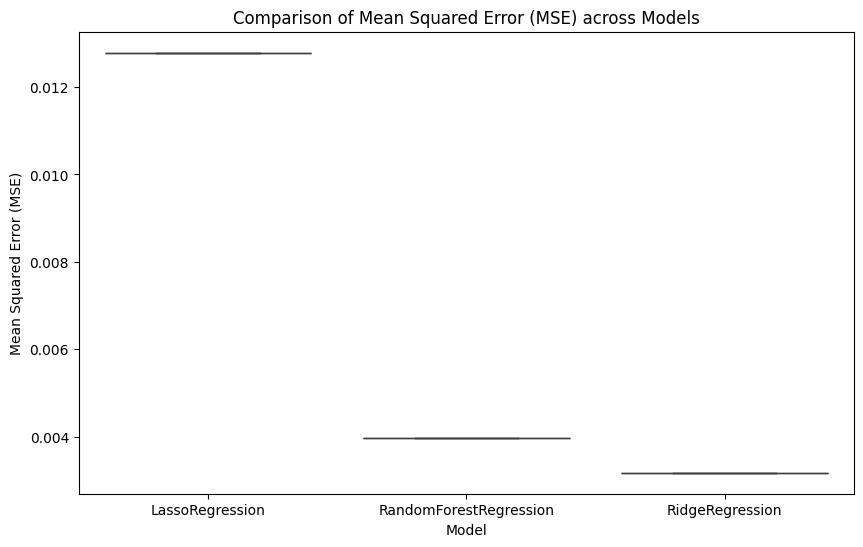

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='MSE', data=scores_df)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) across Models')
plt.xticks(rotation=0)
plt.show()

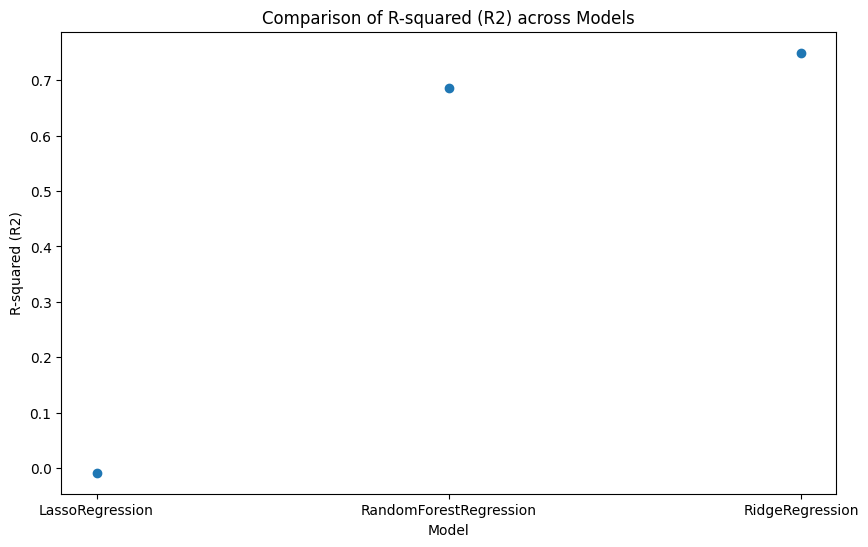

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(scores_df['Model'], scores_df['R2'])
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) across Models')
plt.xticks(rotation=0)
plt.show()

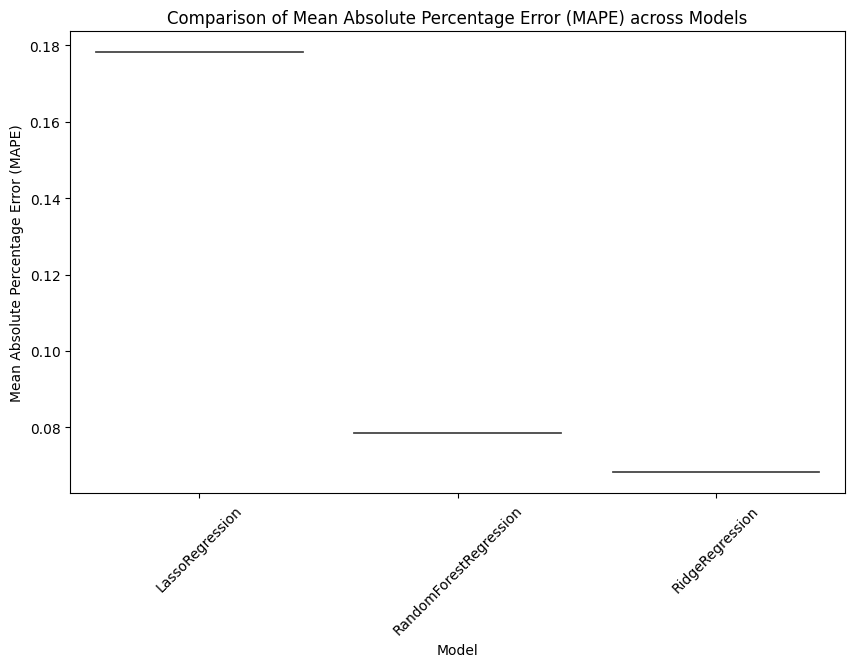

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Model', y='MAPE', data=scores_df)
plt.xlabel('Model')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('Comparison of Mean Absolute Percentage Error (MAPE) across Models')
plt.xticks(rotation=45)
plt.show()

In [21]:
model_scores

[{'MAE': 0.08643256903353057,
  'MSE': 0.012784739962013526,
  'RMSE': 0.11306962440024963,
  'R2': -0.008454392030916802,
  'MAPE': 0.17811816594194244,
  'Model': 'LassoRegression'},
 {'MAE': 0.04241485811560579,
  'MSE': 0.003979009484767361,
  'RMSE': 0.06307939033287624,
  'R2': 0.6861375669142393,
  'MAPE': 0.07862393204088343,
  'Model': 'RandomForestRegression'},
 {'MAE': 0.03751252893014637,
  'MSE': 0.003173461419985361,
  'RMSE': 0.05633348400361335,
  'R2': 0.7496788267548871,
  'MAPE': 0.06826327871770019,
  'Model': 'RidgeRegression'}]

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

for scores, model_name in model_scores:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=scores, x='Score', kde=True, bins=20)
    plt.title(f'Histogram of Scores for {model_name}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()


ValueError: too many values to unpack (expected 2)